In [ ]:
import autograd.numpy as np

layers_sizes = [100,25,4]

n_hidden = np.size(layers_sizes)
print(n_hidden)

P = [None]*(n_hidden + 1)
print(len(P))
 
P[0] = np.random.randn(layers_sizes[0], 2 + 1 ) # 2 since we have two points, +1 to include bias
#print(P[0])
for l in range(1,n_hidden):
    P[l] = np.random.randn(layers_sizes[l], layers_sizes[l-1] + 1) # +1 to include bias

P[-1] = np.random.randn(1,layers_sizes[-1]+1)
#print(P[-1])

for i in range(len(P)):
    print(P[i].shape)

In [ ]:
num_points = 1; x_prev = [[4],[3]]

x_prev = np.concatenate((np.ones((1,num_points)), x_prev ), axis = 0)
print(x_prev)

a = np.linspace(0,1,2)
print(a)
print(a[:-1])

In [ ]:
import numpy as np
from support import *
Nx,Ny,Nt = 100,100,100
x,y,t = np.linspace(-1,1,Nx),np.linspace(-1,1,Ny),np.linspace(0,1,Nt)

xx,tt = np.meshgrid(x,t)
xgrid = np.vstack([xx.flatten(),tt.flatten()]).T
print(xgrid.shape)
x_,t_ = xgrid[:,0], xgrid[:,1]
L = 2.
mu = 0.000001/np.pi
eig = (np.pi**2*mu)/(2.*L**2)
print(np.exp(eig))
#sol = -2.*(np.pi*mu*np.cos(np.pi*x_/L))/(np.sin(np.pi*x_/L) - np.exp(eig*t_))

sol = -np.sin(np.pi*x_)*np.exp(-mu*np.pi**2*t_)

sol = sol.reshape(Nx,Nt)
print(sol.shape)

plot2D(xx,tt,sol)

In [ ]:
from networkFlowTorch import *
from PDEq import *
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(1)

layer_out_sizes = [20,20,20,20,20,20,20,20,1]

hidden_func = 'gelu' # sigmoid, relu, elu, leaky_relu, tanh, swish, gelu, hard_sigmoid, exponential

act_funcs = []; act_ders = []
for i in range(len(layer_out_sizes)-1):
    act_funcs.append(hidden_func)

act_funcs.append(None); 

#PDE = Diffusion1D(sim_type='flow')
PDE = Burger1D(sim_type='flow')
#PDE = Wave1D(sim_type='flow')
f = PDE.right_hand_side

Nt,Nx = 100,100
T0,T,L0,Lx = 0,1,-1,1

x_bound = [L0,Lx]; t_lim = [T0,T]
x = np.linspace(x_bound[0],x_bound[1],Nx)
t = np.linspace(t_lim[0],t_lim[1],Nt)
        
domain_array = anp.array([t,x])
lmbda = 1e-6
        
network = FFNNetworkFlow(layer_output_size=layer_out_sizes,
                                activation_functions=act_funcs,
                                PDE=PDE,
                                source_function=f,
                                domain_array=domain_array,
                                domain=x_bound,
                                gd_method='adam',
                                learning_rate=None)
        
network.collocation_setup(bounds=(x_bound,t_lim),colloc_points=10000,
                                bound_points=50,init_points=50)

In [ ]:
network.create_layers(lmbda=lmbda)
print(network.model.layers)

In [ ]:
Nt,Nx,Ny = 100,100,100

t0,x0,y0 = 0,0,0
T,Lx,Ly = 1,1,1
t_lim = [t0,T]; x_bound = [x0,Lx]; y_bound = [y0,Ly]
t = np.linspace(t_lim[0],t_lim[1],Nt)
x = np.linspace(x_bound[0],x_bound[1],Nx)
y = np.linspace(y_bound[0],y_bound[1],Ny)
        
domain_array = (t,x,y)

tt,xx,yy = np.meshgrid(t,x,y,indexing='ij')
print(tt.shape)
print(xx.shape)
print(yy.shape)

xgrid = np.vstack([tt.flatten(),xx.flatten(),yy.flatten()]).T
x_, y_, t_ = xgrid[:,1],xgrid[:,2],xgrid[:,0]
eig = anp.pi**2*(1/Lx**2 + 1/Ly**2)

f = anp.sin(anp.pi*x_/Lx)*anp.sin(anp.pi*y_/Ly)*anp.exp(-eig*t_)
f_re = f.reshape(Nt,Nx,Ny)

plot2D(xx[:,:,50],yy[:,:,50],f_re[:,:,50])
plot2D(xx[50,:,:],yy[50,:,:],f_re[:,:,50])

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x_ = np.linspace(-1,1,100)
t_ = np.linspace(-1,1,100)

x,t,c = sp.symbols('x,t,c')
L = 1.
#f = sp.exp(-sp.pi**2 * t/(L**2)) * sp.sin(sp.pi * x/L)
f = sp.exp(-sp.pi**2 * t) * sp.sin(sp.pi * x)

#f_num = sp.lambdify(x, f.subs({t: t_}))
f_num = np.zeros((100,100))
f_new = f.subs({t: t_[0]})
f_num[0] = sp.lambdify(x,f.subs({t: t_[0]}))(x_)
print(f_num)


In [ ]:
import numpy as np
import math 

es = np.zeros(8)
ls = np.zeros_like(es)
cs = np.zeros_like(es)
for i in range(8):
    e = np.random.uniform(1e-5,1e-1)
    l = np.random.uniform(1e-9,1e-4)

    e2 = 10 ** np.random.uniform(math.log10(1e-5), math.log10(1e-1))
    l2 = 10 ** np.random.uniform(math.log10(1e-9), math.log10(1e-6))
    es[i] = e2; ls[i] = l2

    cs[i] = np.random.uniform(2,10)
    #print('\n %.4e, %.4e' %(e,l))
    #print()
    #print('%.4e, %.4e' %(e2,l2))


(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x', ylabel='y'>)

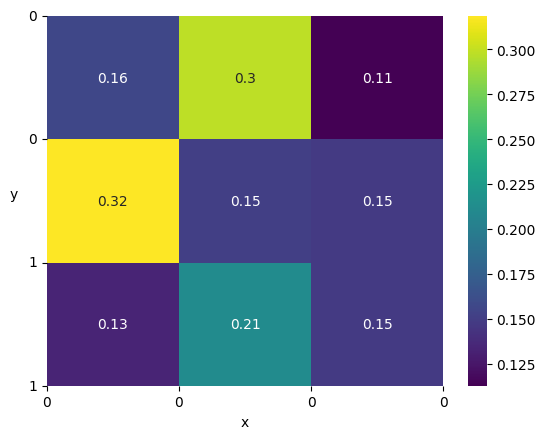

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from support import *

# Example data: Replace these with your actual results
param1 = np.random.uniform(0.01, 0.1, 100)  # Random param1 (e.g., learning rate)
param2 = np.random.uniform(0.1, 0.9, 100)  # Random param2 (e.g., regularization)
loss = np.random.uniform(0.1, 1.0, 100)    # Random loss values

#rand_scatter(loss,[param1,param2])
#rand_scatter3d(loss,[param1,param2])
rand_heatmap(loss,[param1,param2])
#rand_contour(loss,[param1,param2])

In [ ]:
from scipy.interpolate import griddata

# Define a finer grid
param1_fine = np.linspace(min(param1), max(param1), 100)
param2_fine = np.linspace(min(param2), max(param2), 100)
param1_grid, param2_grid = np.meshgrid(param1_fine, param2_fine)

# Interpolate loss onto the fine grid
grid_loss_interp = griddata(
    points=(param1, param2), values=loss,
    xi=(param1_grid, param2_grid), method='linear'
)

# Plot contour
plt.figure(figsize=(8, 6))
plt.contourf(param1_grid, param2_grid, grid_loss_interp, levels=20, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('Param 1')
plt.ylabel('Param 2')
plt.title('Contour Plot of Loss')
plt.show()


1000


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

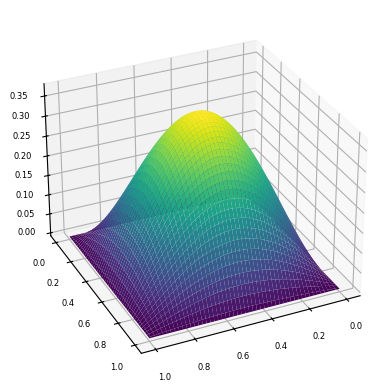

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from support import plot2D
t = np.linspace(0,1,1000)
x,y = np.linspace(0,1,100),np.linspace(0,1,100)
xx,yy = np.meshgrid(x,y,indexing='ij')
X, Y = xx.flatten(),yy.flatten()

Lx = 1; Ly=1
D = 1
eig = D*np.pi**2*((1/Lx**2) + (1/Ly**2))

f = {}
for n in range(len(t)):
    ff = np.sin(np.pi*X/Lx)*np.sin(np.pi*Y/Ly)*np.exp(-eig*t[n])
    f[n] = ff.reshape(len(x),len(y))
print(len(f))
ff = f[50].reshape(100,100)

plot2D(xx,yy,ff)



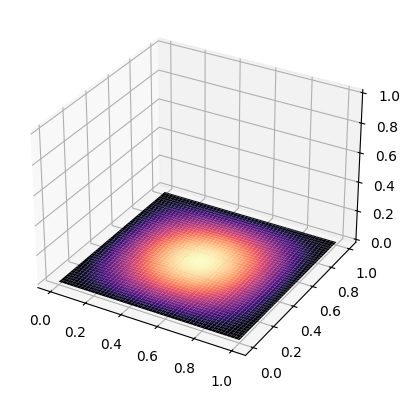

In [39]:
import matplotlib.animation as anim

fig,ax = plt.subplots(subplot_kw={'projection': '3d'})
frames = []
for n, val in f.items():
    surf = ax.plot_surface(xx,yy,val, rstride=2, cstride=2,cmap='magma')
    frames.append([surf])
anima = anim.ArtistAnimation(fig,frames, interval=400, blit=True,repeat_delay=1000)
anima.save('test.gif',writer='pillow',fps=15)

In [7]:
import numpy as np
a = np.logspace(-5,-1,10)
a = [0,1,2,3,4]

print(type(a[0]) is list)
print(np.min(a[0]))

False
0
